In [1]:
import nltk
from konlpy.corpus import kobill
import pandas as pd
files_ko = kobill.fileids()

In [2]:
df = pd.read_csv('./data/test_set_final.csv')
df

,Unnamed: 0,nickname,score,review,stay_date
0,0,karolinernes,50,이그제큐티브 라운지 칵테일 뷔페는 생각보다 넘 별로였어요 메뉴가 얼마 없어서 ifc...,2021-07-01
1,1,mikyung782021,50,직원분들 모두들 너무 친전하셨고 말하지 않아도 무엇이 필요한지 먼저 오퍼해 주셨어요...,2021-07-01
2,2,shinobu2,20,가격대비 메리크가 없으며 이제는 가격을 어느정도 지불해야지만 앞의 조망을 즐길수 있...,2021-07-01
3,3,sharpgoodman,50,가족들과 즐거운 여름 휴가를 보낼 수 있었습니다 더운 여름이었지만 11시쯤 걸어다닌...,2021-07-01
4,4,sunkeem,50,위치 주차 시설 서비스 등 호텔이 제공해야 할 모든면이 편리하고 좋았다 자녀들과 함...,2021-07-01
...,...,...,...,...,...
3559,3559,Jay L,50,매전 출장올때마다 이곳만 이용하는데 깔끔하고 친절한 서비스에 항상 만족하고있어요 욕...,2018-07-01
3560,3560,본 리,40,깨끗하고 펍도 있어서 좋아요 방도 넒고 시설도 괜찮네요 프론트 직원들도 너무 친절...,2018-07-01
3561,3561,KilsuKim,40,호텔에 도착하면 먼저 입구에 비치된 시원한 물한잔을 마십니다 프론트 데스크 직원에게...,2018-07-01
3562,3562,yooo1357,50,객실도 깔끔하고 공항과 가까워서 이동하기 편리했습니다 직원들도 친절히 설명해주어서 ...,2018-06-01


In [3]:
df = df[['stay_date', 'review', 'score']]
df['stay_date'] = pd.to_datetime(df['stay_date'])
df.sort_values(by='stay_date', inplace=True)

<ipython-input-3-b7e89c08afa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stay_date'] = pd.to_datetime(df['stay_date'])
<ipython-input-3-b7e89c08afa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='stay_date', inplace=True)


In [4]:
df.reset_index(inplace=True)

In [5]:
def func(x):
    d = {}
    d['reviews'] = ' '.join(x['review'])
    d['review_count'] = x['review'].count()
    d['mean_score'] = x['score'].mean()
    return pd.Series(d, index=['reviews', 'review_count', 'mean_score'])

In [6]:
data = df.groupby(['stay_date']).apply(func)

In [7]:
data

,reviews,review_count,mean_score
stay_date,,,
2018-06-01,제주 공항과 가깝고 깔끔하고 가성비 좋은 호텔입니다 여기에 더불어 조식도 끝내주고요...,102,48.431373
2018-07-01,방에서의 룸 전망이 좋고 침구 상태도 좋다 하지만 화장실이 아쉬웠는데 욕조가 너무 ...,53,45.471698
2018-08-01,친구들이랑 호캉스로 투숙했는데 방도 깔끔하고 침구류도 구매하고싶을 정도로 편했습니다...,57,45.263158
2018-09-01,깨끗하고 조용하고 깔끔하고 편하게 쉬다가요 위치도 좋아서 걸어서 어디든 갈수있엇고 ...,107,46.448598
2018-10-01,어떤 일이 있어도 뷰 님이 다 알아서 해주니 걱정말고 다녀오세요룸 컨디션도 조식도 ...,114,47.719298
2018-11-01,2박3일동안 잘지내다왔습니다 깨끗하고 위치도 좋아요 침대도 넓어 뒹굴뒹굴 편했어요 ...,106,46.698113
2018-12-01,일단 다른 후기들에서도 보고 예약했지만 배딩이 진짜 좋아요 이불이 엄청 두껍거나 한...,159,47.044025
2019-01-01,아이들 방학에 뜻깊은 추억을 만들어주고 싶어서 밀레니엄 호텔후기를 보고 예약했습니다...,175,48.057143
2019-02-01,깔끔하고 고급스러운 시설과 친절한 서비스로 만족 스럽게 잘 이용하고 갑니다 수영장에...,164,47.195122


In [90]:
data.reviews[0]

'제주 공항과 가깝고 깔끔하고 가성비 좋은 호텔입니다 여기에 더불어 조식도 끝내주고요 제주도의 시작과 끝을 이 호텔에서 이용한다면 편리할거 같습니다 객실도 너무 깨끗하고 침구류는 너무 마음에 드네요 여의도나 강서 지역 쪽 방문하신다면 접근이 용이한 글래드 여의도 추천드립니다 서비스 숙소 위치 어느하나 빠는 것 없습니다 우선 위치가 역 바로 앞에 있어서 너무 교통이 편리했고 친절한 직원분들과 엘리베이터도 잡아주시는 직원분에게 너무 친절함을 느껴서 좋은 인상을 받았습니다  업그레이드도 받아서 더 넓은 공간에서 휴식하고 특히 청결상태가 너무너무 만족스러워서 좋았습니다 다음 휴가때도 여의도 글래드호텔에서 숙박할 것 같아요 직원분들께 감사드립니다 여의도에 출장이 자주 있어 종종 이용합니다 다른 곳에서 묵는 경우도 많지만 여의도에서 글래드 호텔만한 곳은 찾기 어려운 듯 합니다 우선 주차가 매우 편안하고 로비도 적당히 넓직해 편안함을 줍니다 침대 방의 청결 상태 인터넷 등의 환경도 아주 양호합니다 디럭스 넓고 룸컨디션도 완전 좋아요 직원분들도 다 친절하고 요구사항 빠르게 대응해주세요 재방뭄 의사 많이 있습니다 굿 호텔이 깔끔하고 항상 그렇듯 침대가 너무 좋네욯 분위기도 있구 세세한 디테일한 점들이 보여서 좋았어요 자주 올 순 없겠지만 올기회있음 다시 방문하겠습니다 접근성 내부시설 어메니티 등 최고입니다 서울시내 여행 후 한강 둘러보고 편안하게 쉬기에 적합하고 쾌적하고 편안하고 조식도 기대이상입니다 위치도 나쁘지 않고 시설도 깨끗하고 직원분들도 친절해요 지난번에도 방문했을때도 만족했는데 이번에도 만족해요 다음에 또 방문 할 예정입니다 체크인도 이벤트로 일찍해주고 좋았습니다 국회의사당역에섳아주아주아줓가까워용 앞에 공사중이라 창문못열어요  1 침구류가 너무 푹신하고 깨끗 2 주차장이 넓다 3 지하철역이 가깝다 4 걸어서 한강을 갈수있다 5 조식이 맛있다 6 난방 에어컨등 바람이 직방이 아니라 간접이다 7 까운이 정말좋음 3번째 방문인데 서울오면 이곳만 찾게되네요 주말에 서울 놀

In [8]:
from konlpy.tag import Okt
t = Okt()

In [9]:
data['tokens'] = data['reviews'].apply(lambda X : t.nouns(X))

In [78]:
data

,reviews,review_count,mean_score,tokens
stay_date,,,,
2018-06-01,제주 공항과 가깝고 깔끔하고 가성비 좋은 호텔입니다 여기에 더불어 조식도 끝내주고요...,102,48.431373,"[제주, 공항, 가성, 비, 호텔, 여기, 조식, 제주도, 시작, 끝, 이, 호텔,..."
2018-07-01,방에서의 룸 전망이 좋고 침구 상태도 좋다 하지만 화장실이 아쉬웠는데 욕조가 너무 ...,53,45.471698,"[방, 룸, 전망, 침구, 상태, 화장실, 욕조, 샤워, 것, 욕실, 바닥, 물이,..."
2018-08-01,친구들이랑 호캉스로 투숙했는데 방도 깔끔하고 침구류도 구매하고싶을 정도로 편했습니다...,57,45.263158,"[친구, 호캉스, 투숙, 방도, 침구, 류, 구매, 정도, 직원, 친철, 기분, 체..."
2018-09-01,깨끗하고 조용하고 깔끔하고 편하게 쉬다가요 위치도 좋아서 걸어서 어디든 갈수있엇고 ...,107,46.448598,"[위치, 어디, 재미, 불평엊, 기념일, 멀리, 가지, 서울, 호캉스, 예약, 정말..."
2018-10-01,어떤 일이 있어도 뷰 님이 다 알아서 해주니 걱정말고 다녀오세요룸 컨디션도 조식도 ...,114,47.719298,"[뷰, 님, 걱정, 룸, 컨디션, 조식, 아래, 경관, 모두, 엄지, 호주, 안심,..."
2018-11-01,2박3일동안 잘지내다왔습니다 깨끗하고 위치도 좋아요 침대도 넓어 뒹굴뒹굴 편했어요 ...,106,46.698113,"[박, 위치, 침대, 다음, 여행, 때, 또, 이용, 지난주, 결혼기념일, 이번, ..."
2018-12-01,일단 다른 후기들에서도 보고 예약했지만 배딩이 진짜 좋아요 이불이 엄청 두껍거나 한...,159,47.044025,"[일단, 다른, 후기, 보고, 예약, 배딩, 진짜, 이불, 것, 폭, 잠, 룸, 컨..."
2019-01-01,아이들 방학에 뜻깊은 추억을 만들어주고 싶어서 밀레니엄 호텔후기를 보고 예약했습니다...,175,48.057143,"[아이, 방학, 뜻, 추억, 밀레니엄, 호텔, 후기, 보고, 예약, 호텔, 후기, ..."
2019-02-01,깔끔하고 고급스러운 시설과 친절한 서비스로 만족 스럽게 잘 이용하고 갑니다 수영장에...,164,47.195122,"[시설, 서비스, 만족, 이용, 수영장, 아이, 객, 시설, 관리, 상태, 부대, ..."


In [11]:
def topic_count(x, topic):
    num = 0
    for token in x:
        if token in topic:
            num += 1
    return num

In [26]:
dt_topic7 = data.tokens.apply(topic_count, topic=['수영장', '사우나', '수영', '야외']) 

<AxesSubplot:xlabel='stay_date'>

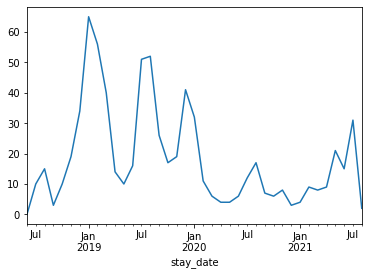

In [27]:
dt_topic7.plot()

In [38]:
dt_topic2 = data.tokens.apply(topic_count, topic=['방역', '마스크', '신경', '코로나']) 

In [64]:
topic2_reg = dt_topic2 / data.review_count * 100

<AxesSubplot:xlabel='stay_date'>

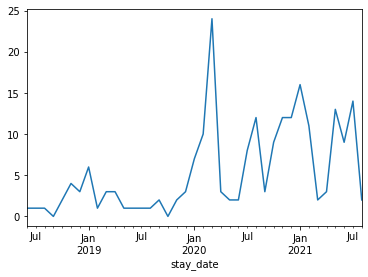

In [42]:
dt_topic2.plot()

<AxesSubplot:xlabel='stay_date'>

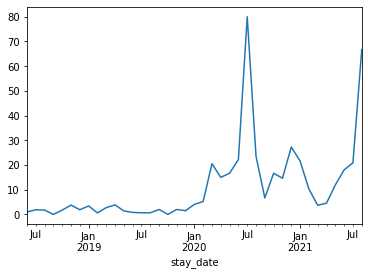

In [65]:
topic2_reg.plot()

In [35]:
dt_topic3 = data.tokens.apply(topic_count, topic=['화장실', '침대', '청소', '욕조', '냄새'])

<AxesSubplot:xlabel='stay_date'>

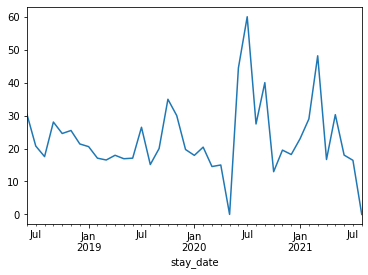

In [37]:
(dt_topic3 / data.review_count * 100).plot()

In [85]:
df_topic2 = pd.DataFrame(dt_topic2)
df_topic2 = df_topic2.reset_index()
df_topic2.columns = ['ds', 'y']
df_topic2

,ds,y
0,2018-06-01,1
1,2018-07-01,1
2,2018-08-01,1
3,2018-09-01,0
4,2018-10-01,2
5,2018-11-01,4
6,2018-12-01,3
7,2019-01-01,6
8,2019-02-01,1
9,2019-03-01,3


In [86]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=10, 
                changepoints=['2020-02-01', '2020-03-01'], 
                yearly_seasonality=10, 
                weekly_seasonality=False, 
                daily_seasonality=False, 
                growth='linear')
model.add_country_holidays(country_name='KR')
model.fit(df_topic2)

In [87]:
future = model.make_future_dataframe(periods=0, freq='M')
forecast = model.predict(future)

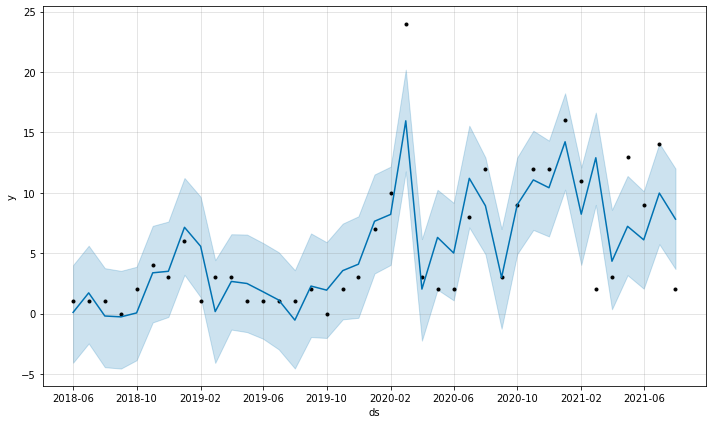

In [88]:
fig1 = model.plot(forecast)

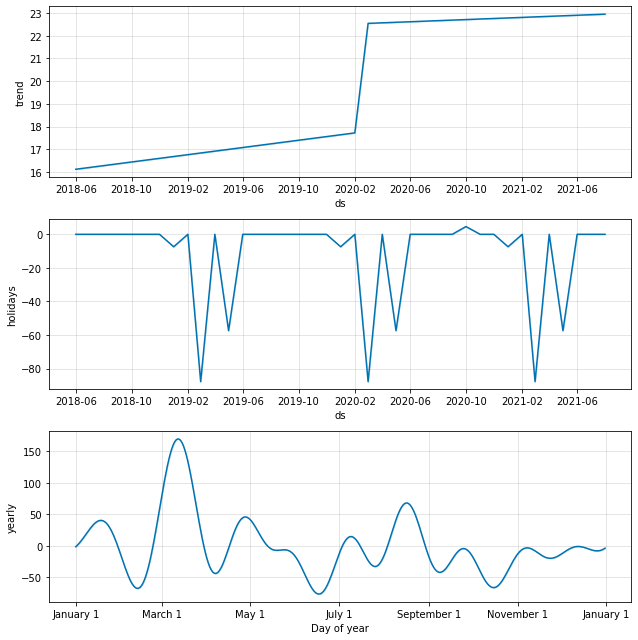

In [89]:
fig2 = model.plot_components(forecast)